In [ ]:
# Instalacion de librerias
!pip install pysoundfile

In [ ]:
# Librerias
from google.colab import drive
from multiprocessing import Pool
import IPython.display as ipd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import librosa
import random
import time

# Montaje de drive
drive.mount('/content/drive')

# Obtencion y normalizacion del dataset
dir_carpeta = '/content/drive/My Drive/Colab Notebooks/Audio Dataset Snowboy'
lista_wav = glob.glob(os.path.join(dir_carpeta, '*.wav'))
print(f"Total de archivos .wav encontrados: {len(lista_wav)}")
dataset = []
longitud = 49152

for ruta in lista_wav:
  audio,sr = librosa.load(ruta,sr=16000)
  if len(audio)==longitud:
    scale = np.max(abs(audio))
    dataset.append(audio/scale)
  print(f"Procesando archivo:{ruta} | Longitud:{len(audio)} | Aceptado:{len(audio)==longitud}")

dataset = (np.vstack(dataset))
print(f"Dimensiones finales del dataset: {dataset.shape}")

# Recorte del dataset
dataset = dataset[:,12500:35000]
longitud = dataset.shape[1]

# Dataset promedio opcional
dataset = np.mean(dataset,0)/np.max(abs(np.mean(dataset,0)))

print(f"Dimensiones finales del dataset: {dataset.shape}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Total de archivos .wav encontrados: 401
Procesando archivo:/content/drive/My Drive/Colab Notebooks/Audio Dataset Snowboy/018fc125-e139-4562-8a6a-f52a7d7532de.wav | Longitud:49152 | Aceptado:True
Procesando archivo:/content/drive/My Drive/Colab Notebooks/Audio Dataset Snowboy/01ebb523-a7ed-403a-890a-e9dc9007e8f9.wav | Longitud:49152 | Aceptado:True
Procesando archivo:/content/drive/My Drive/Colab Notebooks/Audio Dataset Snowboy/0127dbef-3960-49e3-b6da-6ca8545c6514.wav | Longitud:49152 | Aceptado:True
Procesando archivo:/content/drive/My Drive/Colab Notebooks/Audio Dataset Snowboy/066f43c7-5732-4471-86e6-c37a8fda484c.wav | Longitud:49152 | Aceptado:True
Procesando archivo:/content/drive/My Drive/Colab Notebooks/Audio Dataset Snowboy/04289dde-6e45-47db-a908-bbeafa7ad4d4.wav | Longitud:49152 | Aceptado:True
Procesando archivo:/content/drive/My Drive/Colab Noteboo

In [ ]:
# Creacion de una poblacion aleatoria
N = 50
Gen = 0
historico = []
poblacion = (np.random.rand(N,longitud)*2-1)

# Alternativa poblacion en ceros
poblacion = (np.zeros((N,longitud)))

In [ ]:
## CICLO DE GENERACIONES
while 1:

  inicio = time.time()

  rendimiento = []
  for individuo in poblacion:
    error = np.sum(abs(dataset-individuo))
    rendimiento.append(-error)
  rendimiento = np.hstack(rendimiento)

  # Ordenado de la poblacion
  indices_ordenados = np.argsort(rendimiento)[::-1]
  rendimiento = rendimiento[indices_ordenados]
  poblacion = poblacion[indices_ordenados]

  # Definicion de la elite
  B = int(N/4)
  elite = poblacion[:B]

  # Creacion de hijos con mutaciones
  crias = []
  prob_mut = 0.0001
  rango_mut = 0.1
  for n in range(N-B):
    indx_padres = np.random.choice(B,2,replace=False)
    mascara = np.random.randint(0,2,size=longitud,dtype=bool)
    hijo = np.where(mascara,elite[indx_padres[0]],elite[indx_padres[1]])
    mascara_mut = np.random.rand(longitud)<prob_mut
    hijo[mascara_mut] += np.random.uniform(-rango_mut,+rango_mut,size=np.sum(mascara_mut))
    crias.append(hijo)

  poblacion = np.vstack([elite,crias])
  fin = time.time()

  print(f"Gen #{Gen}\t| Mejor:{rendimiento[0]}\t| Media:{np.mean(rendimiento)}\t| Tiempo:{fin-inicio}")
  historico.append(np.mean(rendimiento))
  Gen += 1



Se han truncado las últimas 5000 líneas del flujo de salida.
Gen #35167	| Mejor:-183.08664090845795	| Media:-183.1694184933823	| Tiempo:0.0269317626953125
Gen #35168	| Mejor:-183.0762465074102	| Media:-183.16408882961179	| Tiempo:0.029220104217529297
Gen #35169	| Mejor:-183.07156038621494	| Media:-183.15710108933385	| Tiempo:0.0337376594543457
Gen #35170	| Mejor:-183.0631751074794	| Media:-183.1560686188017	| Tiempo:0.027613401412963867
Gen #35171	| Mejor:-183.05601095303177	| Media:-183.15105574817898	| Tiempo:0.02872157096862793
Gen #35172	| Mejor:-183.05601095303177	| Media:-183.15371999342216	| Tiempo:0.03929305076599121
Gen #35173	| Mejor:-183.03383506159778	| Media:-183.14740158083157	| Tiempo:0.026797056198120117
Gen #35174	| Mejor:-183.03383506159778	| Media:-183.12279064917496	| Tiempo:0.03006458282470703
Gen #35175	| Mejor:-183.03383506159778	| Media:-183.14101686055355	| Tiempo:0.033538818359375
Gen #35176	| Mejor:-183.01771786126125	| Media:-183.12498702334452	| Tiempo:0.03

KeyboardInterrupt: 

In [ ]:
#Pruebas de audio
print(f"Generacion #{Gen}")
ipd.Audio(data=poblacion[0], rate=16000)

Generacion #40167


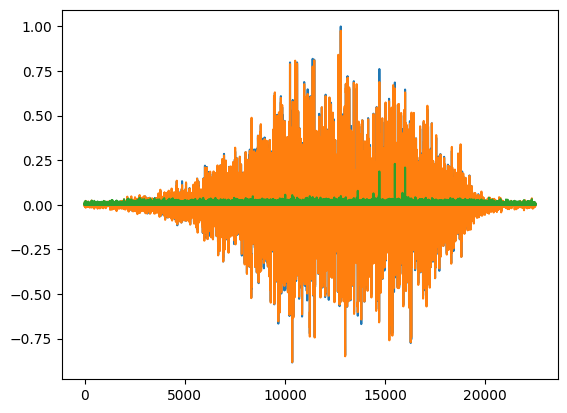

In [ ]:
# Graficado de la primera muestra de poblacion
plt.plot(dataset)
plt.plot(poblacion[0])
plt.plot(abs(dataset-poblacion[0]))

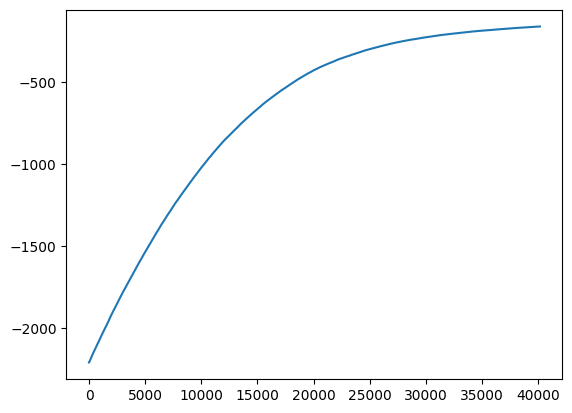

In [ ]:
#Graficado del progreso rendimiento
plt.plot(historico)